In [33]:
!pip install google_images_download

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
import os

os.chdir('/content/drive/My Drive/open_ai/one-piece-character-recognition')

In [10]:
os.getcwd()

'/content/drive/My Drive/open_ai/one-piece-character-recognition'

In [0]:
!googleimagesdownload -k "roronoa-zoro" -s medium -l 100 -o \
. -i one-piece/zoro -cd driver

In [0]:
!googleimagesdownload -k "black-leg sanji" -s medium -l 100 -o \
. -i one-piece/sanji -cd ~/chromedriver

In [0]:
!googleimagesdownload -k "monkey d luffy" -s medium -l 100 -o \
. -i one-piece/luffy -cd ~/chromedriver

In [0]:
!googleimagesdownload -k "god ussop" -s medium -l 100 -o \
. -i one-piece/ussop -cd ~/chromedriver

In [0]:
!googleimagesdownload -k "cat burglar nami" -s medium -l 100 -o \
. -i one-piece/nami -cd ~/chromedriver

In [42]:
for dir in os.listdir('one-piece'):
  dirpath = os.path.join('one-piece', dir)
  removed_files = 0
  
  for fname in os.listdir(dirpath):
    if fname.endswith('.gif'):
      fpath = os.path.join(dirpath, fname)
      os.remove(fpath)
      removed_files += 1
  
  print('For', dir, removed_files, 'files were removed')

For zoro 3 files were removed
For sanji 10 files were removed
For luffy 4 files were removed
For ussop 4 files were removed
For nami 1 files were removed


In [0]:
num_test_files = 20
num_valid_files = 20

os.mkdir('data')

train_path = 'data/train'
os.mkdir(train_path)

valid_path = 'data/valid'
os.mkdir(valid_path)

test_path = 'data/test'
os.mkdir(test_path)

In [0]:
for label in os.listdir('one-piece'):
  os.mkdir( os.path.join(train_path, label) )
  os.mkdir( os.path.join(test_path, label) )
  os.mkdir( os.path.join(valid_path, label) )

In [0]:
import random
import shutil

for label in os.listdir('one-piece'):
  label_path = os.path.join('one-piece', label)
  fnames = os.listdir(label_path)
  for fname in fnames[: num_test_files]:
    src_path = os.path.join(label_path, fname)
    dest_path = os.path.join(test_path, label, fname)
    shutil.move(src_path, dest_path)
  for fname in fnames[num_test_files: num_test_files + num_valid_files]:
    src_path = os.path.join(label_path, fname)
    dest_path = os.path.join(valid_path, label, fname)
    shutil.move(src_path, dest_path)
  for fname in fnames[num_test_files + num_valid_files: ]:
    src_path = os.path.join(label_path, fname)
    dest_path = os.path.join(train_path, label, fname)
    shutil.move(src_path, dest_path)

In [0]:
data = ImageDataBunch.from_folder('data', train='train', test='test', 
                                  valid='valid', size=224, 
                                  ds_tfms=get_transforms())
data = data.normalize(imagenet_stats)

In [12]:
data

ImageDataBunch;

Train: LabelList (222 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sanji,sanji,sanji,sanji,sanji
Path: data;

Valid: LabelList (99 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sanji,sanji,sanji,sanji,sanji
Path: data;

Test: LabelList (100 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: data

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [34]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate
1,2.066529,1.449242,0.636364
2,1.461699,1.087955,0.464646
3,1.132967,0.805439,0.323232
4,0.909980,0.781703,0.303030
5,0.736540,0.778015,0.282828
6,0.633810,0.777743,0.282828


In [0]:
learn.save('resnet50-6_cycles')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07


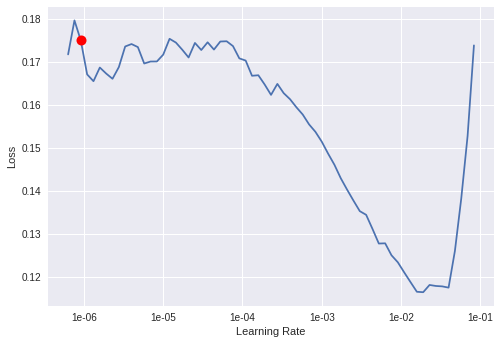

In [30]:
learn.lr_find()

learn.recorder.plot()

In [31]:
learn.unfreeze()

learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate
1,0.645968,4.446337,0.424242
2,0.714845,4.821427,0.444444


In [38]:
learn.load('resnet50-6_cycles')

Learner(data=ImageDataBunch;

Train: LabelList (222 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sanji,sanji,sanji,sanji,sanji
Path: data;

Valid: LabelList (99 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sanji,sanji,sanji,sanji,sanji
Path: data;

Test: LabelList (100 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): C

In [39]:
learn.unfreeze()

learn.fit_one_cycle(5, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate
1,0.140579,0.774159,0.272727
2,0.182291,0.776743,0.282828
3,0.173415,0.772932,0.262626
4,0.164957,0.785954,0.262626
5,0.160798,0.787239,0.252525


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

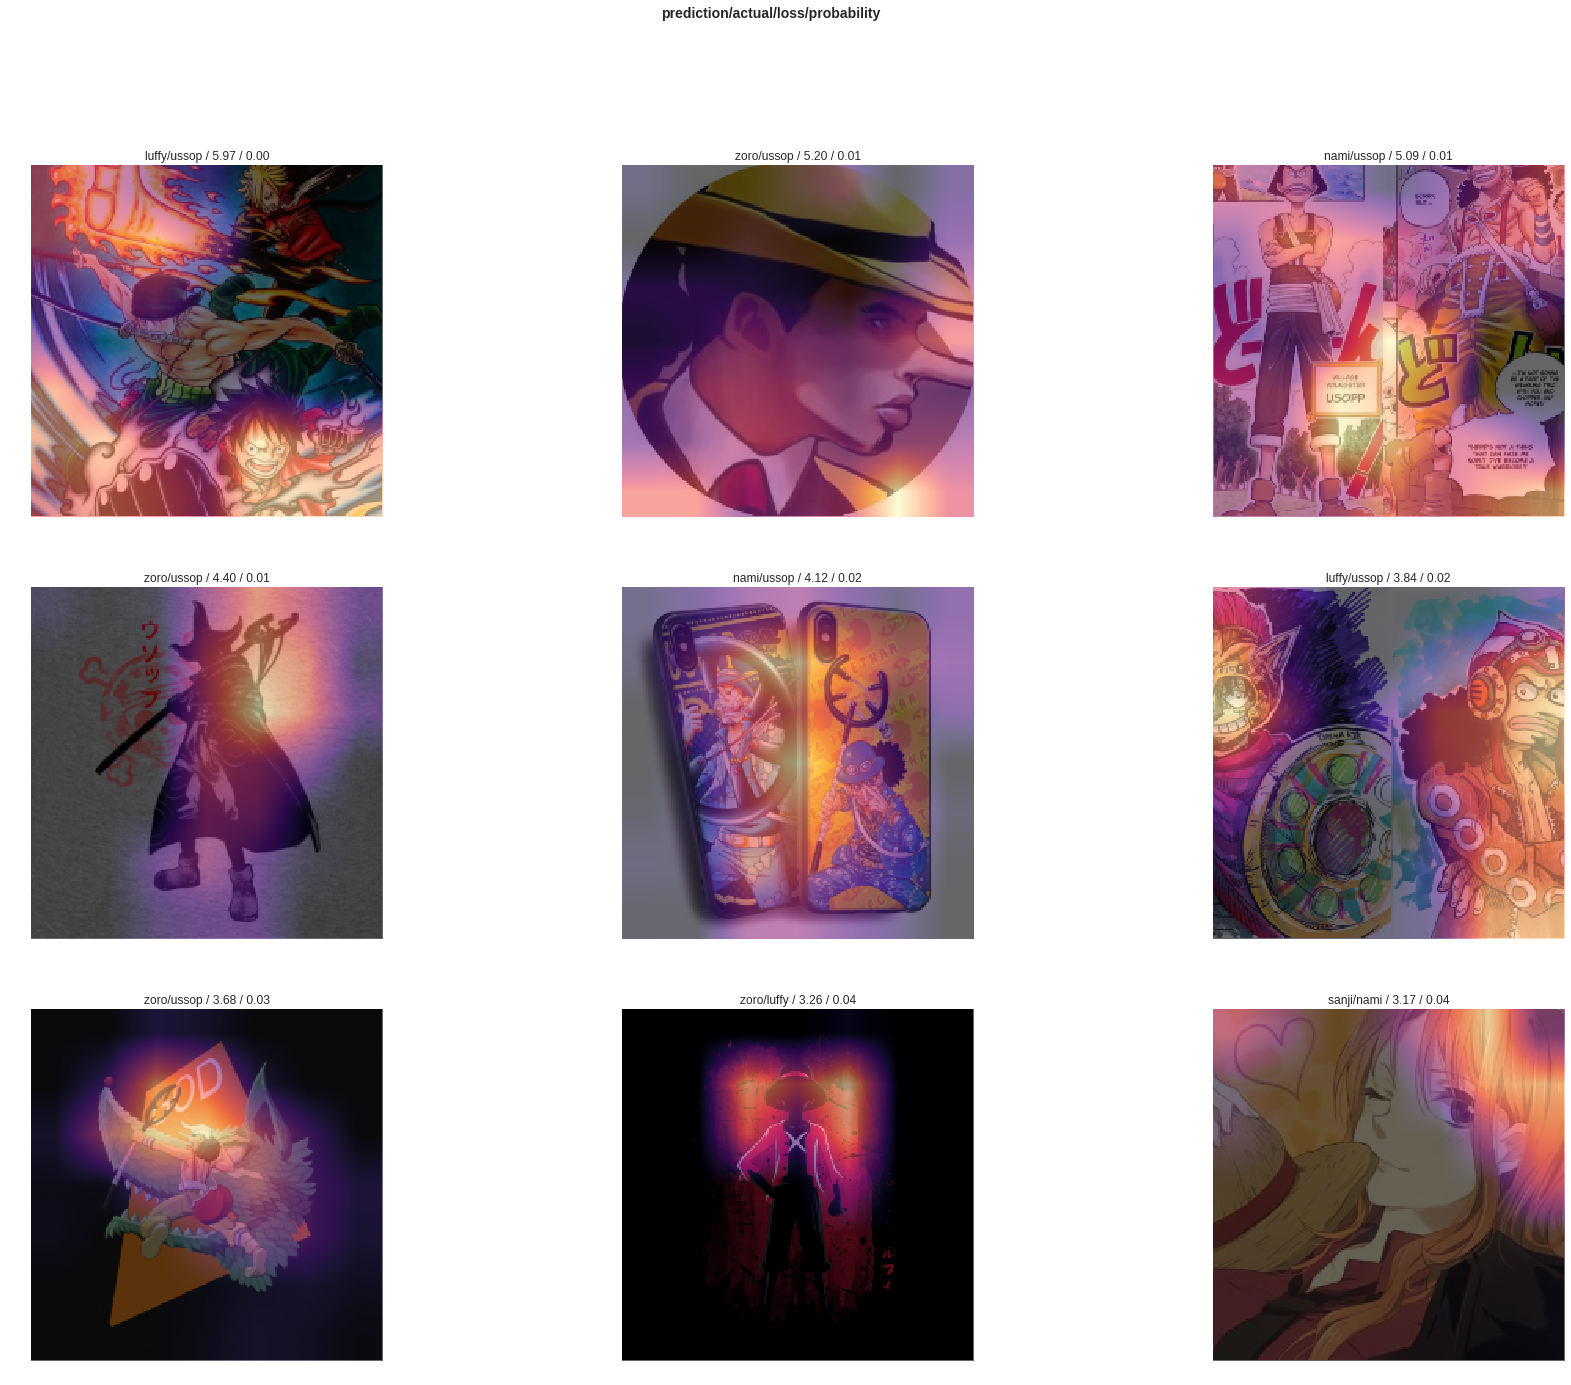

In [41]:
interp.plot_top_losses(9, figsize=(30, 22))

In [21]:
interp.most_confused(min_val=2)

[('ussop', 'luffy', 6), ('sanji', 'zoro', 5)]

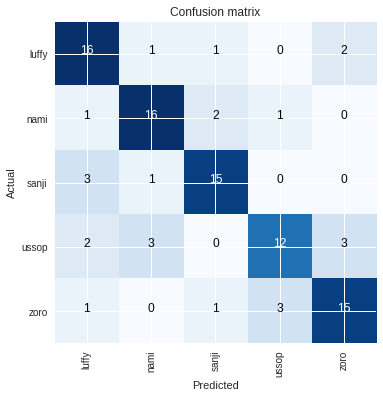

In [42]:
interp.plot_confusion_matrix()